<a href="https://colab.research.google.com/github/Koushikgoud/Machine-Learning/blob/main/GMM_BGI_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OBJECTIVES:

*   BACKGROUND IMAGE EXTRACTION FROM A VIDEO 
*   BACKGROUND SUBTRACTED IMAGES (FOREGROUND) EXTRACTION USING BACKGROUND IMAGE



In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

Upload the video from which we want to extract background image

In [ ]:
from google.colab import files
files.upload()

In [ ]:
video = cv2.VideoCapture(r"/content/IMG_0022-xs.mov")

STEP-1: Extract frames from the video, save them in an array and convert that array to a numpy array

In [ ]:
from inspect import FrameInfo
frames = []
frame_count = 0
while True:
  ret, frame = video.read()
  if frame is not None:
    frames.append(frame)
    frame_count += 1
  else:
    break
frames = np.array(frames)

In [ ]:
print("Number of frames extracted is {}".format(frame_count))
print("(num of frames, image width, image height, num of channels){}".format(frames.shape))

Number of frames extracted is 2577
(num of frames, image width, image height, num of channels)(2577, 202, 360, 3)


STEP-2: Initialize a dummy background image with same shape as the individual frames

In [ ]:
# initialize a dummy background image with all zeros
background = np.zeros(shape=(frames.shape[1:]))
"dummy background image shape {}".format(background.shape)

'dummy background image shape (202, 360, 3)'

In [ ]:
frames.shape[1]

202

In [ ]:
x = frames[:, 0, 1, 1]
x

array([156, 156, 156, ..., 149, 149, 149], dtype=uint8)

STEP-3: Initializing the Guassian Mixture Model.
We are using the GaussianMixture class from sklearn.mixture module in scikit-learn library

`n_components=2` represents that the Guassian Mixture Model will model pixel intensities as a mixture of two Guassian Mixtures, where one Guassian represents background pixels (Highest weight) and other Guassian represents the foreground pixels.(Lower weight) 


In [ ]:
# gmm = GaussianMixture(n_components = 2, covariance_type='full', n_init = 5)
gmm = GaussianMixture(n_components = 2)

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Filter convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


STEP-4: Extracting the background image from the video which will later be used to generate "BACKGROUND SUBTRACTED IMAGES"
*   For each pixel, we apply the gmm model to get the means, covariances and weights. 
*   We select the mean value of the cluster which has the highest weight among all clusters because highest weighted cluster comes from the background whereas all the other clusters may come from the foreground due to the dynamically changing behavior of the foreground objects.
*   Now, we apply all highest weighted intensity(mean) values to the dummy background we created earlier which results in the background image.














In [ ]:
for i in range(frames.shape[1]):
  for j in range(frames.shape[2]):
    for k in range(frames.shape[3]):
      pixel = frames[:, i, j, k]
      pixel = pixel.reshape(pixel.shape[0], 1)
      gmm.fit(pixel)
      means = gmm.means_
      covariances = gmm.covariances_
      weights = gmm.weights_
      idx = np.argmax(weights)

      # print(f"means: {means}, covars: {covariances}\nweights: {weights}, argmax idx: {idx}")
      background[i][j][k] = int(means[idx])

Display the extracted background image and saving the background image to the disk 

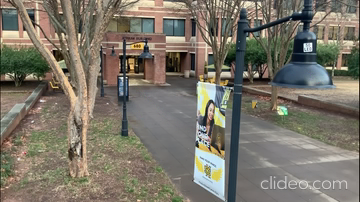

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(background)

In [ ]:
cv2.imwrite('background_image.png', background)

True

In [ ]:
# files.upload()

STEP-5: BACKGROUND SUBTRACTED IMAGES (FOREGROUND) EXTRACTION

*   Load the video and background image
*   For each frame in the video, subtract the background image from the current frame.
*   Set a fixed threshold value and apply to the background subtracted image to get a binary mask. In our case, pixels with intensities greater than threshold are set to color 255 i.e., white and intensities less that threshold are set to black. This is because the difference image is calculated by subtracting the current frame from the background model, which should mostly contain pixels corresponding to the background. Thus, pixels with high intensity values in diff are likely to correspond to regions of the image that have changed from the background model, and therefore are often classified as foreground pixels.
*   Remove noise from the binary mask. In our case, we used morphological opening operarion which involves erosion and dilation to remove noise. We are using `cv2.morphologyex()` function which takes three input arguments: binary mask, type of morphological operation (`cv2.MORPH_OPEN`) and kernel (structuring element)
*   In our case, we are converting the mask image from BGR color space into gray scale. We did this using `cv2.cvtColor(mask, color)` function.
*   Display and save the gray scale foreground image using `cv2_imshow(image)` and `cv2.imwrite("img_name.png", image)`.























For frame_number: 29:


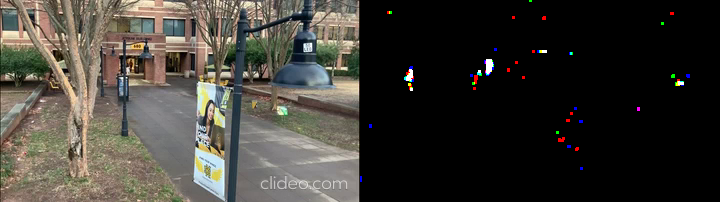

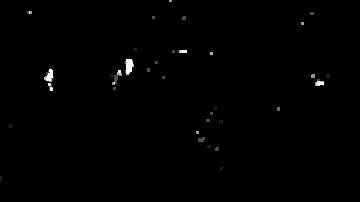

For frame_number: 99:


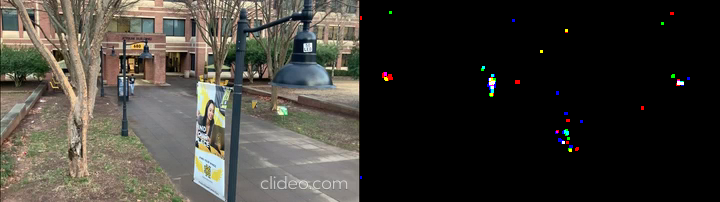

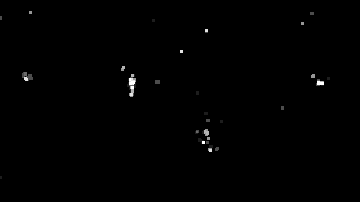

For frame_number: 135:


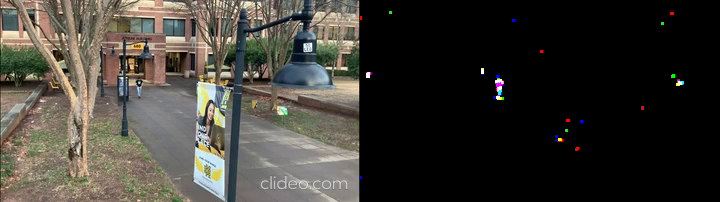

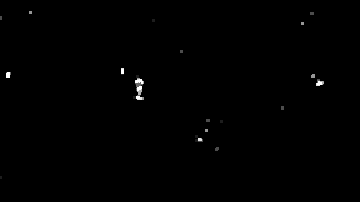

For frame_number: 199:


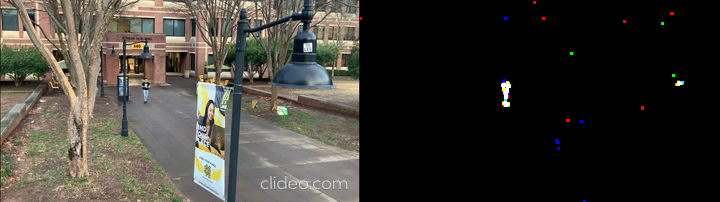

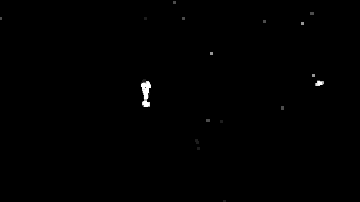

For frame_number: 243:


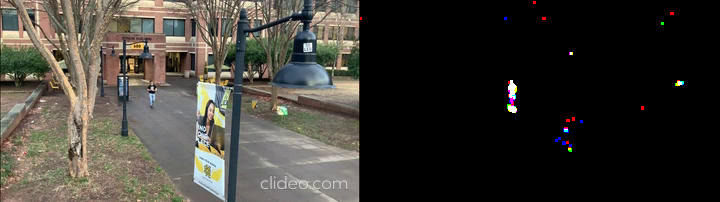

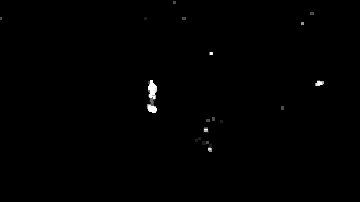

For frame_number: 288:


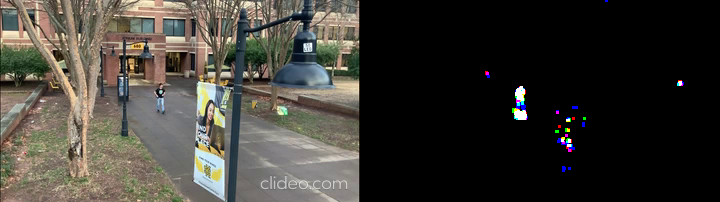

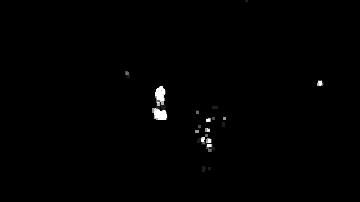

For frame_number: 339:


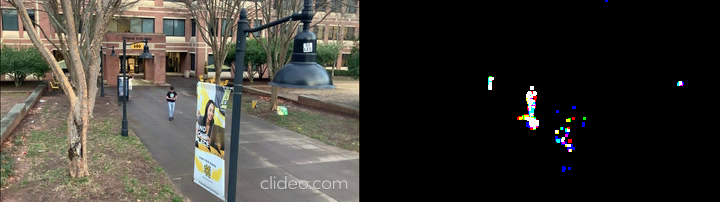

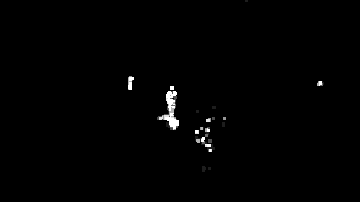

For frame_number: 389:


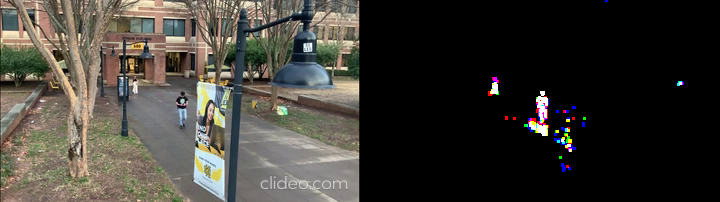

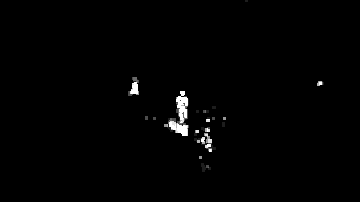

For frame_number: 441:


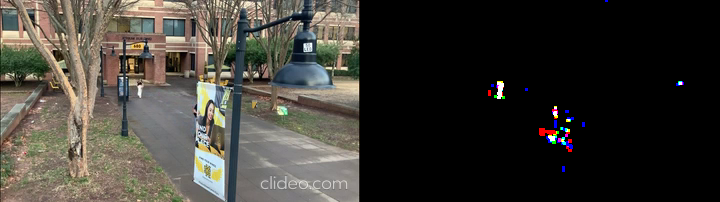

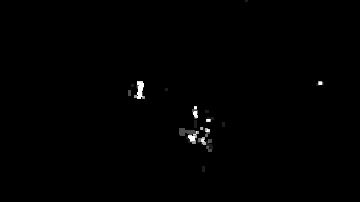

For frame_number: 485:


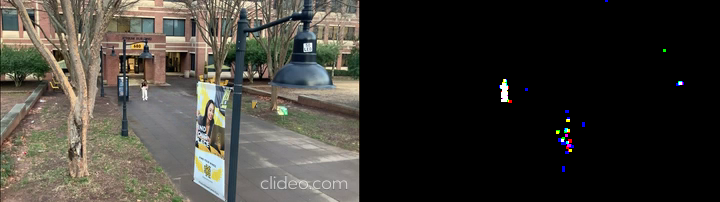

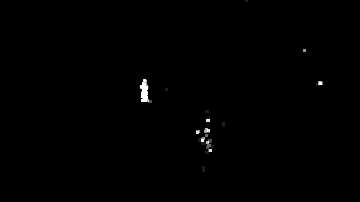

For frame_number: 509:


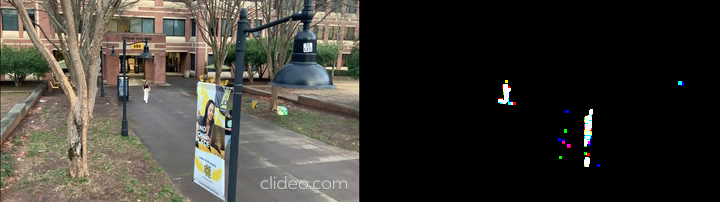

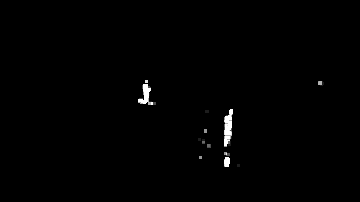

For frame_number: 548:


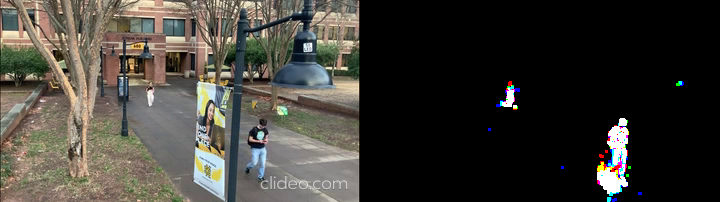

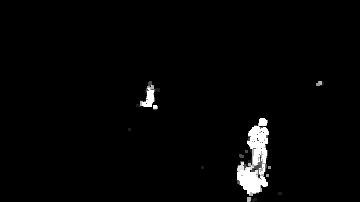

For frame_number: 602:


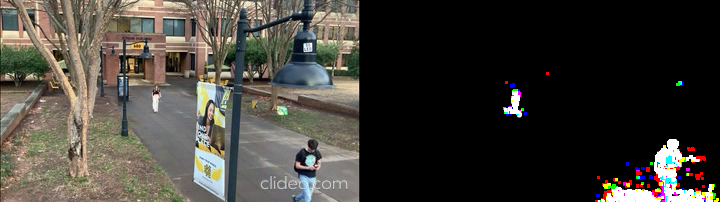

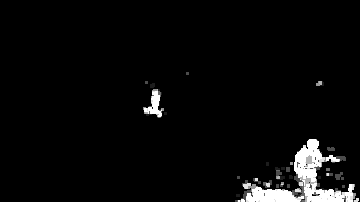

For frame_number: 666:


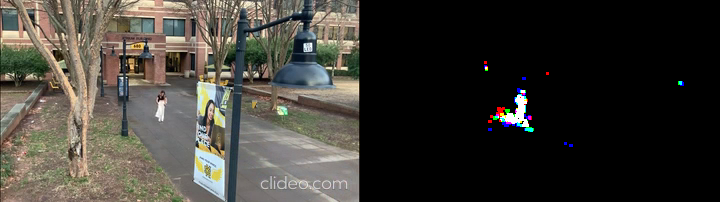

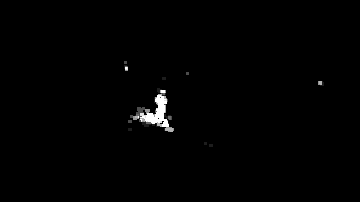

For frame_number: 736:


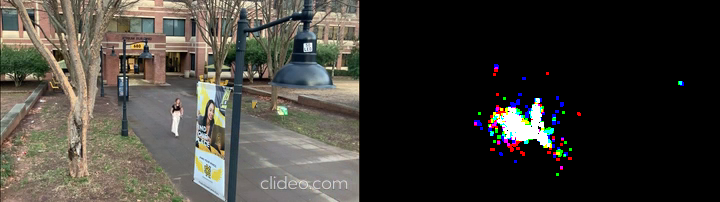

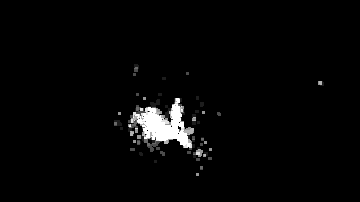

For frame_number: 784:


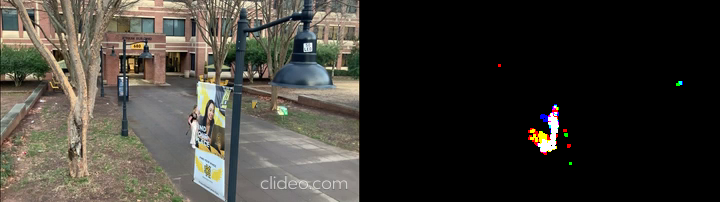

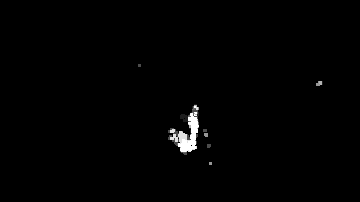

For frame_number: 831:


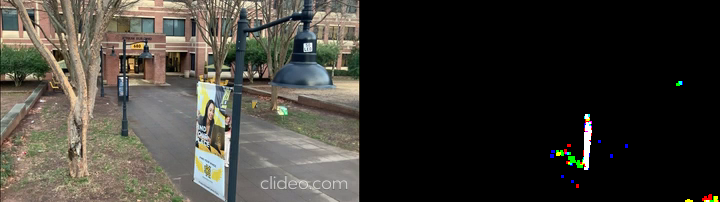

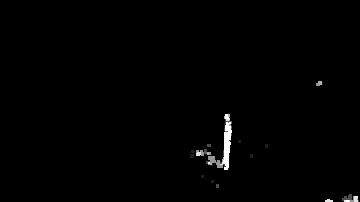

For frame_number: 1029:


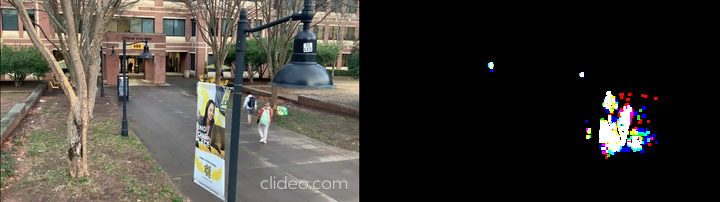

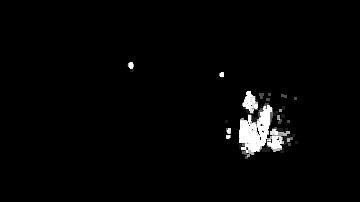

For frame_number: 1072:


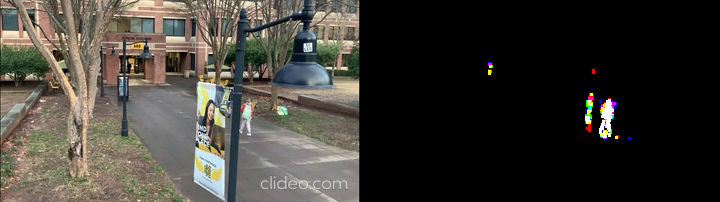

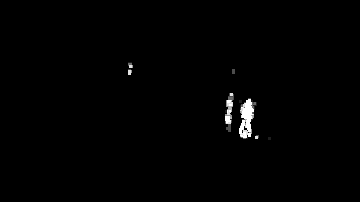

For frame_number: 1269:


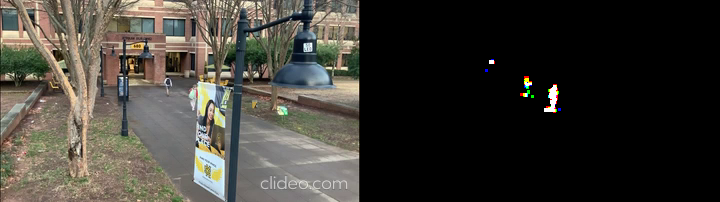

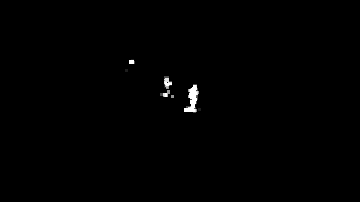

For frame_number: 1326:


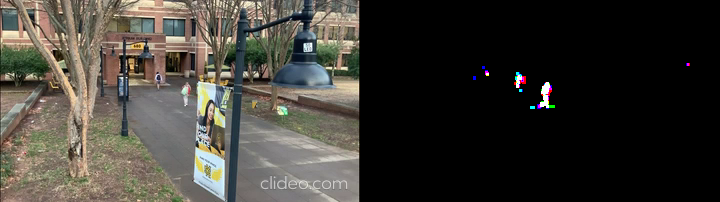

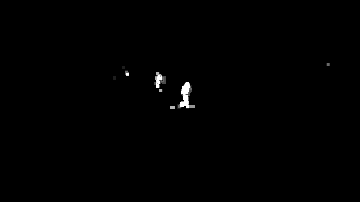

For frame_number: 1390:


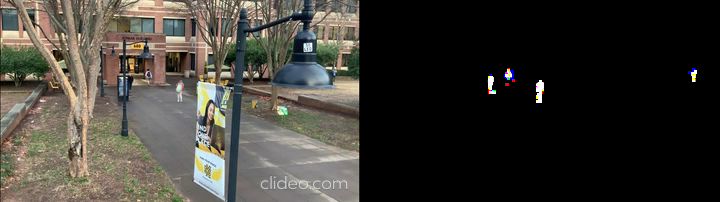

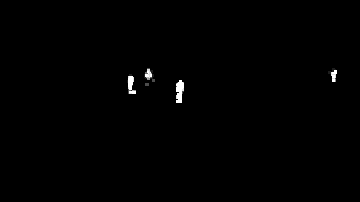

For frame_number: 1475:


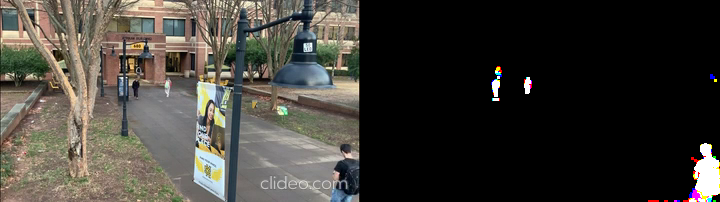

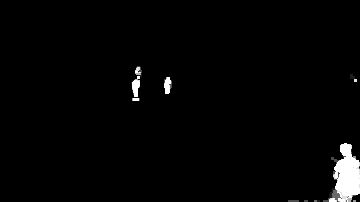

For frame_number: 1524:


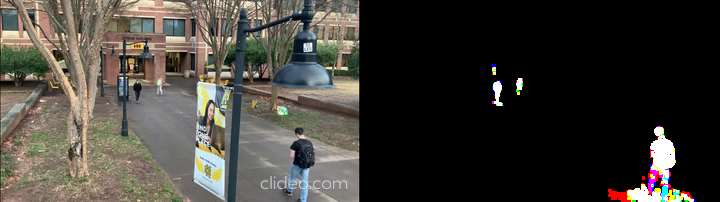

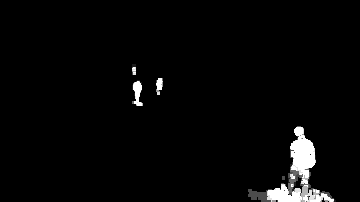

For frame_number: 1605:


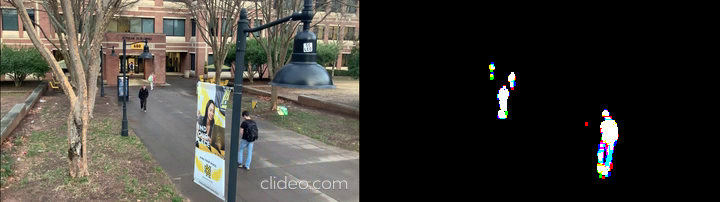

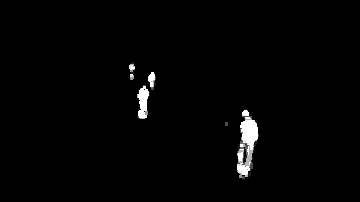

For frame_number: 1685:


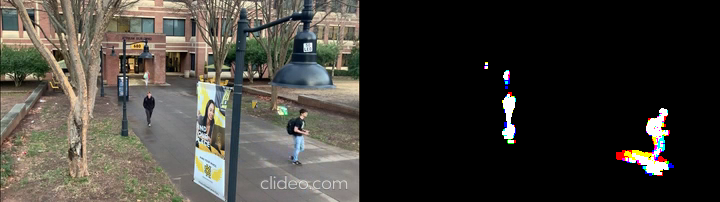

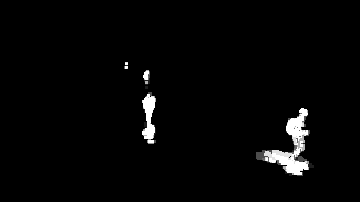

For frame_number: 1802:


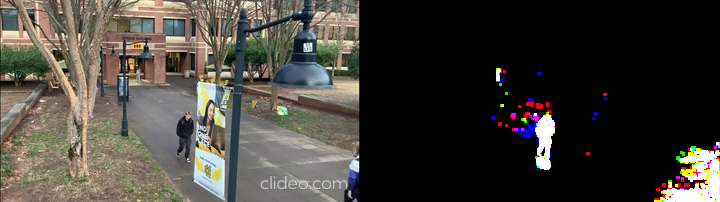

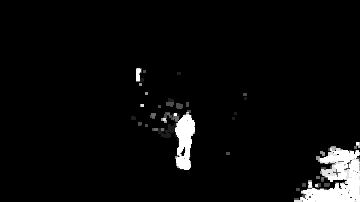

For frame_number: 1846:


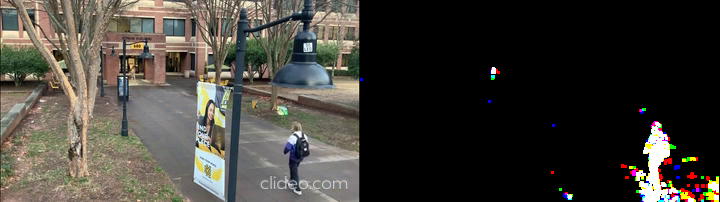

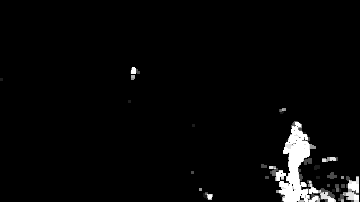

For frame_number: 1894:


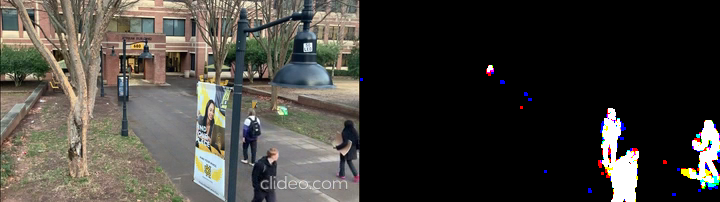

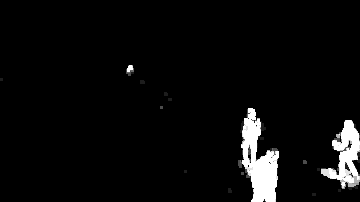

For frame_number: 1900:


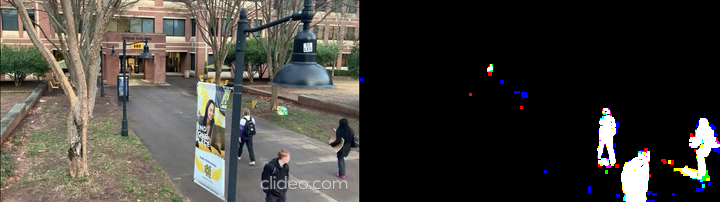

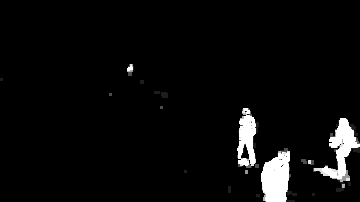

For frame_number: 1941:


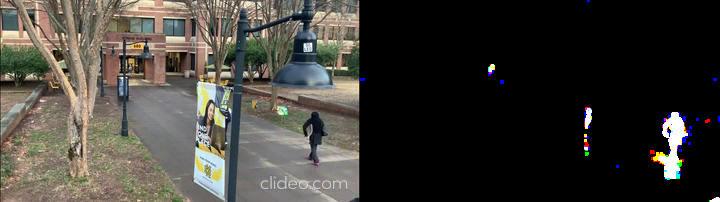

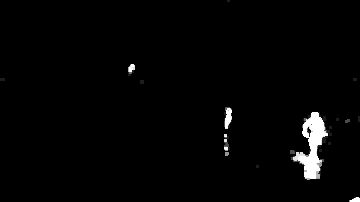

For frame_number: 2117:


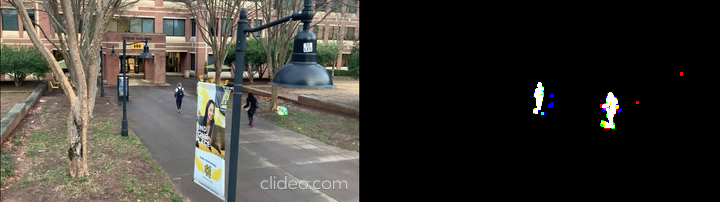

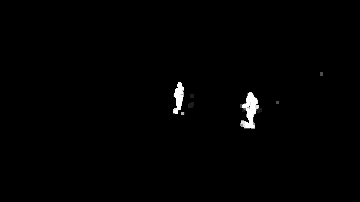

For frame_number: 2161:


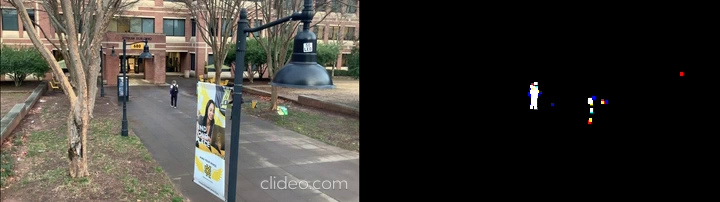

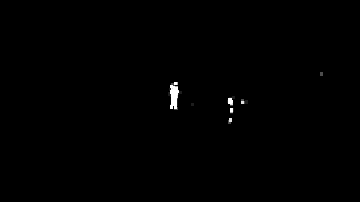

For frame_number: 2248:


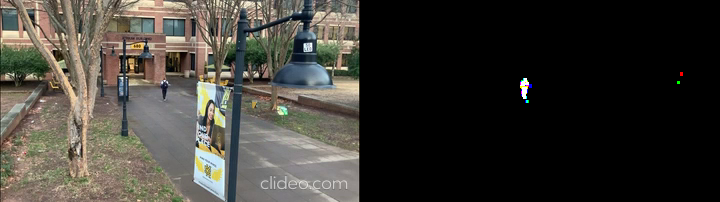

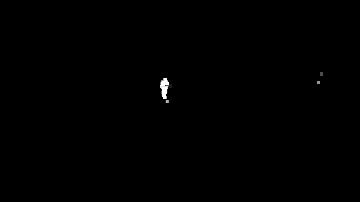

For frame_number: 2271:


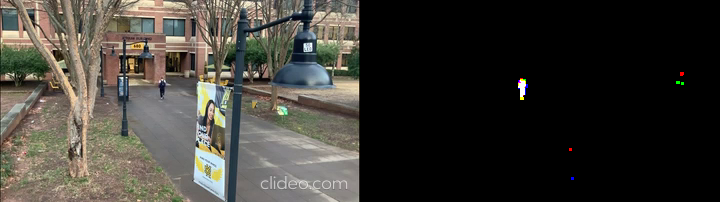

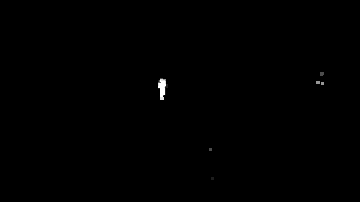

For frame_number: 2341:


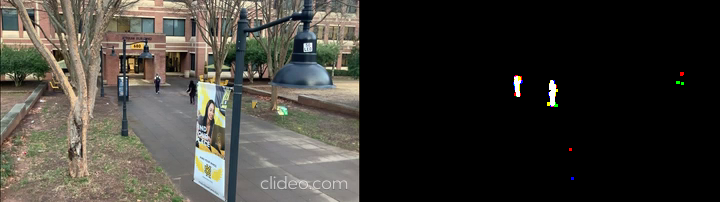

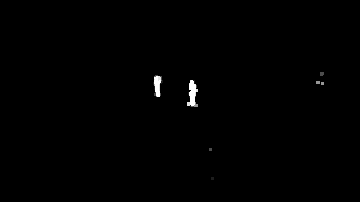

In [22]:
import psutil
# load the background image and the video
video = cv2.VideoCapture(r"/content/IMG_0022-xs.mov")
background = cv2.imread(r'/content/background_image.png')
iter_count = 1
display_frame_numbers = [29, 99, 135, 199, 243, 288, 339, 389, 441, 485, 509, 548, 602, 666, 736, 784, 831, 1029, 1072, 1269,
                         1326, 1390, 1475, 1524, 1605, 1685, 1802, 1846, 1894, 1900, 1941, 2117, 2161, 2248, 2271, 2341, 2580]

# loop over the video stream
while iter_count <= frame_count:
    # read a frame from the video stream
    ret, frame = video.read()
    # print(f"frame: {frame}, background: {background}")

    if frame is None:
      print("No frame loaded")
      break
    
    # print(iter_count)

    # subtract the background image from the current frame
    diff = cv2.absdiff(frame, background)
    # diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

    # apply threshold the difference image to create a binary mask
    threshold = 7
    mask = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)[1]

    # Apply adaptive thresholding
    # mask = cv2.adaptiveThreshold(diff, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # apply a morphological opening operation to remove noise
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # convert the mask to grayscale
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    #concatenate the mask and frame for performance comparison
    output = np.concatenate((frame, mask), axis = 1)

    #display and save the images based on criteria
    if iter_count in display_frame_numbers:
      print(f"For frame_number: {iter_count}:")
      #save the background image to the disk
      cv2.imwrite(f"bgfg_combimg_frame{iter_count}.png", output)
      cv2.imwrite(f"gray_img_frame{iter_count}.png", mask_gray)
      cv2_imshow(output)
      cv2_imshow(mask_gray)

    iter_count+=1

    #monitor memory usage
    # process = psutil.Process()
    # memory_usage = process.memory_info().rss/(1024**2)
    # print(f"{memory_usage:.2f} MB")

    # wait for a key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# release the video capture
video.release()

# close all windows
cv2.destroyAllWindows()